In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

# ШАГ 1. Общая информация

In [2]:
#Откроем датасет
data = pd.read_csv('logs_exp.csv', sep='\t')
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [19]:
#Проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Вывод: Столбец EventTimestamp, который содержит дату, представлен в числовом виде, приведём его к типу дата.

# ШАГ 2. Готовим данные

In [20]:
#Меняем названия столбцов
data.columns = ['name', 'user', 'time', 'exp']

#Меняем тип данных столбца на дату
data['time'] = pd.to_datetime(data['time'], unit='s')

#Добавляем новый столбец с датой
data['date'] = data['time'].dt.strftime('%Y-%m-%d')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

data.head()

,name,user,time,exp,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   name    244126 non-null  object        
 1   user    244126 non-null  int64         
 2   time    244126 non-null  datetime64[ns]
 3   exp     244126 non-null  int64         
 4   date    244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [7]:
#Посмотрим количество пропусков
data.isna().sum()

name    0
user    0
time    0
exp     0
date    0
dtype: int64

In [8]:
#Посмотрим количество дубликатов
print('Всего дубликатов:', data.duplicated().sum())

#Записей всего - 244126
entries = 244126

#Найдём долю
print('Доля дубликатов от общего объёма:', round(data.duplicated().sum() / entries * 100, 2),'%')

Всего дубликатов: 413
Доля дубликатов от общего объёма: 0.17 %


In [9]:
#Проверим отсутствие пересечения пользователей в группах
duple = data.groupby('user').agg({'exp':'nunique'}).query('exp > 1').reset_index()
duple

,user,exp


Вывод: 1) Заменили названия столбцов, 
2) поменяли тип данных для столбца с датой;
3) удалили дубликаты;
4) Сделали проверку, что пересечения пользователей в группах нет.

# ШАГ 3. Проверка данных

In [10]:
#Посчитаем количество событий
ent = data['user'].count()
print('Количество событий:', ent)

Количество событий: 244126


In [11]:
#Посчитаем количество пользователей
pol = data['user'].nunique()
print('Количество пользователей:', pol)

Количество пользователей: 7551


In [12]:
#Посчитаем какое количество событий в среднем приходится на пользователя
med = data.groupby('user')['name'].agg('count').median()
print('В среднем событий приходится на пользователя: ', med)

В среднем событий приходится на пользователя:  20.0


In [13]:
minq = data['time'].min()
maxq = data['time'].max()
print('Дата начала исследования', minq)
print('Дата конца исследования', maxq)

Дата начала исследования 2019-07-25 04:43:36
Дата конца исследования 2019-08-07 21:15:17


### Постройте гистограмму по дате и времени.

Text(0.5, 0, 'Дата')

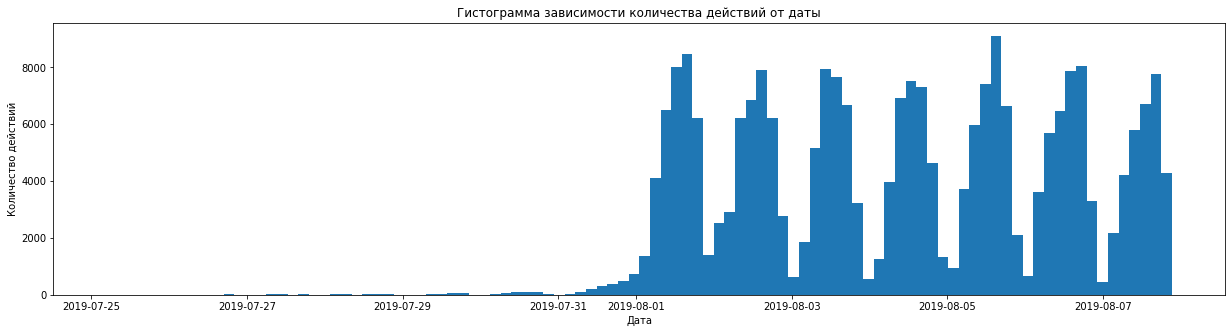

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(21, 5))
axes.hist(data['time'], bins= 100)
axes.set_title('Гистограмма зависимости количества действий от даты')
axes.set_ylabel('Количество действий')
axes.set_xlabel('Дата')

Вывод: Логи за период с 2019-07-25 по 2019-08-07. Всего событий в логе 244126, а пользователей 7551. В среднем на пользователя приходится 20 событий. По графику можно увидеть, что полные данные начинаются примерно с середины исследования, будем считать дату полных исследований 1 августа.

In [14]:
#Отбросим неполные данные
data = data['2019-08-01 00:00' <= data['time']]

In [15]:
ent_new = data['user'].count()
print('Всего событий за новый период:', ent_new)

Всего событий за новый период: 241298


In [16]:
pol_new = data['user'].nunique()
print('Пользователей в логе за новый период:', pol_new)

Пользователей в логе за новый период: 7534


In [17]:
med_new = data.groupby('user')['name'].agg('count').median()
print('В среднем событий приходится на пользователя за новый период: ', med_new)

В среднем событий приходится на пользователя за новый период:  19.0


In [18]:
#Посчитаем абсолютные значения и доли тех кого мы потеряли
print('Событий потеряно:', ent - ent_new)
print('Доля потерянных событий:', round((ent - ent_new) / ent * 100, 2), '%')
print('Пользователей потеряно:', pol - pol_new)
print('Доля потерянных пользователей:', round((pol - pol_new) / pol * 100, 2), '%')

Событий потеряно: 2828
Доля потерянных событий: 1.16 %
Пользователей потеряно: 17
Доля потерянных пользователей: 0.23 %


In [19]:
data_246 = data.query('exp == 246')
data_246.head()

,name,user,time,exp,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2834,OffersScreenAppear,3737462046622621720,2019-08-01 00:10:26,246,2019-08-01


In [20]:
data_247 = data.query('exp == 247')
data_247.head()

,name,user,time,exp,date
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01
2838,MainScreenAppear,4899590676214355127,2019-08-01 00:11:28,247,2019-08-01
2839,OffersScreenAppear,4899590676214355127,2019-08-01 00:11:30,247,2019-08-01
2843,OffersScreenAppear,4899590676214355127,2019-08-01 00:12:36,247,2019-08-01


In [21]:
data_248 = data.query('exp == 248')
data_248.head()

,name,user,time,exp,date
2844,MainScreenAppear,4613461174774205834,2019-08-01 00:14:31,248,2019-08-01
2845,MainScreenAppear,4613461174774205834,2019-08-01 00:14:34,248,2019-08-01
2846,CartScreenAppear,4613461174774205834,2019-08-01 00:14:34,248,2019-08-01
2847,PaymentScreenSuccessful,4613461174774205834,2019-08-01 00:14:43,248,2019-08-01
2848,OffersScreenAppear,4613461174774205834,2019-08-01 00:14:51,248,2019-08-01


Вывод: Отбросив неполные данные было потеряно 2828 событий или 1.16%, пользователей было потеряно 17 или 0.23%, удостоверилиь, что во всех группах есть пользователи.

# Шаг 4. Изучим воронку событий

### 1. Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [22]:
ev_frequency = data.groupby('name')['user'].agg(['count', 'nunique']).reset_index().sort_values(by='count', ascending=False)
ev_frequency.columns = ['name', 'count_of_exp', 'nun_us']
ev_frequency['%'] = round(ev_frequency['nun_us'] / pol_new * 100, 2)
ev_frequency

,name,count_of_exp,nun_us,%
1,MainScreenAppear,117431,7419,98.47
2,OffersScreenAppear,46350,4593,60.96
0,CartScreenAppear,42365,3734,49.56
3,PaymentScreenSuccessful,34113,3539,46.97
4,Tutorial,1039,840,11.15


Вывод: Самое частое событие это MainScreenAppear случалось 117431 раз. Второе по популярности событие это OffersScreenAppear случалось 46350 раз. За ним следует CartScreenAppear - оно случалось 42365 раза. Четвёртое событие PaymentScreenSuccessful - 34113 раз. Пятое событие - Tutorial - случалось 1039 раз.

### 2. Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [15]:
ev_pivot = data.pivot_table(index=['name', 'exp'], values='user', aggfunc=['count', 'nunique']).reset_index()
ev_pivot.columns= ['name', 'exp', 'n_events', 'n_users']
ev_pivot

,name,exp,n_events,n_users
0,CartScreenAppear,246,14819,1270
1,CartScreenAppear,247,12570,1240
2,CartScreenAppear,248,15342,1239
3,MainScreenAppear,246,38281,2456
4,MainScreenAppear,247,39710,2482
5,MainScreenAppear,248,41214,2501
6,OffersScreenAppear,246,14910,1545
7,OffersScreenAppear,247,15344,1530
8,OffersScreenAppear,248,16571,1538
9,PaymentScreenSuccessful,246,11970,1202


Вывод: 7419 пользователя хотя бы раз открывали MainScreenAppear это 98.47% пользователей. 4593 пользователей хотя бы раз открывали OffersScreenAppear - 60.96% пользователей. 3734 пользователей хотя бы раз открывали CartScreenAppear это 49.56% всех пользователей. 3539 пользователей хотя бы раз открывали PaymentScreenSuccessful - 46.97% и 840 пользователя открывали Tutorial - 11.15%.

### 3. Предположим, в каком порядке происходят события.

Пользователь сначала открывает MainScreenAppear, 
затем выбирает OffersScreenAppear, 
кладёт их в корзину(CartScreenAppear),
оплачивает(PaymentScreenSuccessful).

### 4. Посчитаем, какая доля пользователей проходит на следующий шаг воронки.

### Воронка событий для 246 группы

In [24]:
ev_pivot_246 = ev_pivot.query('exp == 246').sort_values(by='n_users', ascending=False).drop(['exp', 'n_events'], axis=1).drop([12])

ev_pivot_246.columns = ['name', 'Пользователей на текущем этапе']
ev_pivot_246['Пользователей на следующем этапе'] = ev_pivot_246['Пользователей на текущем этапе'].shift(-1)
ev_pivot_246['Процент от всех пользователей'] = round(ev_pivot_246['Пользователей на текущем этапе'] / ev_pivot_246['Пользователей на текущем этапе'].max() * 100, 2)
ev_pivot_246['Перешло на следующий этап'] = round(ev_pivot_246['Пользователей на следующем этапе'] / ev_pivot_246['Пользователей на текущем этапе'] * 100, 2)

ev_pivot_246

,name,Пользователей на текущем этапе,Пользователей на следующем этапе,Процент от всех пользователей,Перешло на следующий этап
3,MainScreenAppear,2450,1542.0,100.00,62.94
6,OffersScreenAppear,1542,1266.0,62.94,82.10
0,CartScreenAppear,1266,1200.0,51.67,94.79
9,PaymentScreenSuccessful,1200,NaN,48.98,NaN


### Воронка событий для 247 группы

In [25]:
ev_pivot_247 = ev_pivot.query('exp == 247').sort_values(by='n_users', ascending=False).drop(['exp', 'n_events'], axis=1).drop([13])

ev_pivot_247.columns = ['name', 'Пользователей на текущем этапе']
ev_pivot_247['Пользователей на следующем этапе'] = ev_pivot_247['Пользователей на текущем этапе'].shift(-1)
ev_pivot_247['Процент от всех пользователей'] = round(ev_pivot_247['Пользователей на текущем этапе'] / ev_pivot_247['Пользователей на текущем этапе'].max() * 100, 2)
ev_pivot_247['Перешло на следующий этап'] = round(ev_pivot_247['Пользователей на следующем этапе'] / ev_pivot_247['Пользователей на текущем этапе'] * 100, 2)

ev_pivot_247

,name,Пользователей на текущем этапе,Пользователей на следующем этапе,Процент от всех пользователей,Перешло на следующий этап
4,MainScreenAppear,2476,1520.0,100.00,61.39
7,OffersScreenAppear,1520,1238.0,61.39,81.45
1,CartScreenAppear,1238,1158.0,50.00,93.54
10,PaymentScreenSuccessful,1158,NaN,46.77,NaN


### Воронка событий для 248 группы

In [26]:
ev_pivot_248 = ev_pivot.query('exp == 248').sort_values(by='n_users', ascending=False).drop(['exp', 'n_events'], axis=1).drop([14])

ev_pivot_248.columns = ['name', 'Пользователей на текущем этапе']
ev_pivot_248['Пользователей на следующем этапе'] = ev_pivot_248['Пользователей на текущем этапе'].shift(-1)
ev_pivot_248['Процент от всех пользователей'] = round(ev_pivot_248['Пользователей на текущем этапе'] / ev_pivot_248['Пользователей на текущем этапе'].max() * 100, 2)
ev_pivot_248['Перешло на следующий этап'] = round(ev_pivot_248['Пользователей на следующем этапе'] / ev_pivot_248['Пользователей на текущем этапе'] * 100, 2)

ev_pivot_248

,name,Пользователей на текущем этапе,Пользователей на следующем этапе,Процент от всех пользователей,Перешло на следующий этап
5,MainScreenAppear,2493,1531.0,100.00,61.41
8,OffersScreenAppear,1531,1230.0,61.41,80.34
2,CartScreenAppear,1230,1181.0,49.34,96.02
11,PaymentScreenSuccessful,1181,NaN,47.37,NaN


Вывод: Видно, что больше всего пользователей - 37.06% для группы 246 и 38.52% для группы 247 и 248) уходят, посмотрев на главный экран без перехода к каталогу товаров(OffersScreenAppear). Это может говорить о том что интерфейс основной страницы неудобен или некорректно отображается на некоторых устройствах.
От первого события до оплаты доходит меньше половины пользователей (48.98%/46.77%/47.37% для групп 246/247/248 соответственно.)

# Шаг 5. Изучим результаты эксперимента

### 1. Сколько пользователей в каждой экспериментальной группе?

In [27]:
user = data.pivot_table(index=['exp'], values='user', aggfunc=['count', 'nunique']).reset_index()
user.columns = ['exp', 'count', 'users']

user_246 = user.query('exp == 246').reset_index()
print(user_246)
print('-------')

user_247 = user.query('exp == 247').reset_index()
print(user_247)
print('-------')

user_248 = user.query('exp == 248').reset_index()
print(user_248)

   index  exp  count  users
0      0  246  79425   2484
-------
   index  exp  count  users
0      1  247  77147   2513
-------
   index  exp  count  users
0      2  248  84726   2537


Вывод: По таблице видно, что в группе 246 - 2484 человека, в 247 - 2513 человек, а в 248 - 2537.

### 2. Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

H0: Между выборками 246 и 247 нет разницы
H1: Между выборками 246 и 247 имеется разница

In [28]:
alpha = 0.05

p1 = user_246['users'] / user_246['count']
p2 = user_247['users'] / user_247['count']
pc = (user_246['users'] + user_247['users']) / (user_246['count'] + user_247['count'])

dif = p1 - p2 

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/user_246['count'] + 1/user_247['count']))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  [0.14363187]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### 3. Выберите самое популярное событие.

MainScreenAppear самое популярное событие.
Исходя из прошлых проверок:
MainScreenAppear в 246 группе случилось 2450 раз
MainScreenAppear в 247 группе случилось 2476 раз
MainScreenAppear в 248 группе случилось 2493 раза.

In [29]:
ev_pivot

,name,exp,n_events,n_users
0,CartScreenAppear,246,14711,1266
1,CartScreenAppear,247,12456,1238
2,CartScreenAppear,248,15198,1230
3,MainScreenAppear,246,37708,2450
4,MainScreenAppear,247,39123,2476
5,MainScreenAppear,248,40600,2493
6,OffersScreenAppear,246,14773,1542
7,OffersScreenAppear,247,15182,1520
8,OffersScreenAppear,248,16395,1531
9,PaymentScreenSuccessful,246,11910,1200


In [30]:
#Посчитаем количество уникальных пользователей в каждой группе
nuser_246 = data_246['user'].nunique()
print('Пользователей в логе за новый период в группе 246:', nuser_246)

nuser_247 = data_247['user'].nunique()
print('Пользователей в логе за новый период в группе 247:', nuser_247)

nuser_248 = data_248['user'].nunique()
print('Пользователей в логе за новый период в группе 248:', nuser_248)

Пользователей в логе за новый период в группе 246: 2484
Пользователей в логе за новый период в группе 247: 2513
Пользователей в логе за новый период в группе 248: 2537


### Сравнение MainScreenAppear в 246 и 247

In [31]:
alpha = 0.05

#Число человек которые прошли этап MainScreenAppear в группе 246 и 247
pol_67 = np.array([2450, 2476])

#Число совершенных действий на этапе MainScreenAppear в группе 246 и 247
count_67 = np.array([2484, 2513])

p1 = pol_67[0] / count_67[0]
p2 = pol_67[1] / count_67[1]
pc = (pol_67[0] + pol_67[1]) / (count_67[0] + count_67[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_67[0] + 1/count_67[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', round(p_value, 2))

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.76
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение OffersScreenAppear в 246 и 247

In [32]:
alpha = 0.05

#Число человек которые прошли этап OffersScreenAppear в группе 246 и 247
pol_67 = np.array([1542, 1520])

#Число совершенных действий на этапе OffersScreenAppear в группе 246 и 247
count_67 = np.array([2484, 2513])

p1 = pol_67[0] / count_67[0]
p2 = pol_67[1] / count_67[1]
pc = (pol_67[0] + pol_67[1]) / (count_67[0] + count_67[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_67[0] + 1/count_67[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', round(p_value, 2))

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.25
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение CartScreenAppear в 246 и 247

In [33]:
alpha = 0.05

#Число человек которые прошли этап CartScreenAppear в группе 246 и 247
pol_67 = np.array([1266, 1238])

#Число совершенных действий на этапе CartScreenAppear в группе 246 и 247
count_67 = np.array([2484, 2513])

p1 = pol_67[0] / count_67[0]
p2 = pol_67[1] / count_67[1]
pc = (pol_67[0] + pol_67[1]) / (count_67[0] + count_67[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_67[0] + 1/count_67[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение PaymentScreenSuccessful в 246 и 247

In [34]:
alpha = 0.05

#Число человек которые прошли этап PaymentScreenAppear в группе 246 и 247
pol_67 = np.array([1200, 1158])

#Число совершенных действий на этапе PaymentScreenAppear в группе 246 и 247
count_67 = np.array([2484, 2513])

p1 = pol_67[0] / count_67[0]
p2 = pol_67[1] / count_67[1]
pc = (pol_67[0] + pol_67[1]) / (count_67[0] + count_67[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_67[0] + 1/count_67[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравним результаты с каждой из контрольных групп с группой с изменённым шрифтом в отдельности по каждому событию.

### Сравнение MainScreenAppear в 246 и 248

In [35]:
alpha = 0.05

#Число человек которые прошли этап MainScreenAppear в группе 246 и 248
pol_68 = np.array([2450, 2493])

#Число совершенных действий на этапе MainScreenAppear в группе 246 и 248
count_68 = np.array([2484, 2537])

p1 = pol_68[0] / count_68[0]
p2 = pol_68[1] / count_68[1]
pc = (pol_68[0] + pol_68[1]) / (count_68[0] + count_68[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_68[0] + 1/count_68[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение OffersScreenAppear в 246 и 248

In [36]:
alpha = 0.05

#Число человек которые прошли этап OffersScreenAppear в группе 246 и 248
pol_68 = np.array([1542, 1531])

#Число совершенных действий на этапе OffersScreenAppear в группе 246 и 248
count_68 = np.array([2484, 2537])

p1 = pol_68[0] / count_68[0]
p2 = pol_68[1] / count_68[1]
pc = (pol_68[0] + pol_68[1]) / (count_68[0] + count_68[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_68[0] + 1/count_68[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение CartScreenAppear в 246 и 248

In [37]:
alpha = 0.05

#Число человек которые прошли этап CartScreenAppear в группе 246 и 248
pol_68 = np.array([1266, 1230])

#Число совершенных действий на этапе CartScreenAppear в группе 246 и 248
count_68 = np.array([2484, 2537])

p1 = pol_68[0] / count_68[0]
p2 = pol_68[1] / count_68[1]
pc = (pol_68[0] + pol_68[1]) / (count_68[0] + count_68[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_68[0] + 1/count_68[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение PaymentScreenSuccessful в 246 и 248

In [38]:
alpha = 0.05

#Число человек которые прошли этап PaymentScreenAppear в группе 246 и 248
pol_68 = np.array([1200, 1181])

#Число совершенных действий на этапе PaymentScreenAppear в группе 246 и 248
count_68 = np.array([2484, 2537])

p1 = pol_68[0] / count_68[0]
p2 = pol_68[1] / count_68[1]
pc = (pol_68[0] + pol_68[1]) / (count_68[0] + count_68[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_68[0] + 1/count_68[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение MainScreenAppear в 247 и 248

In [39]:
alpha = 0.05

#Число человек которые прошли этап MainScreenAppear в группе 247 и 248
pol_78 = np.array([2476, 2493])

#Число совершенных действий на этапе MainScreenAppear в группе 247 и 248
count_78 = np.array([2513, 2537])

p1 = pol_78[0] / count_78[0]
p2 = pol_78[1] / count_78[1]
pc = (pol_78[0] + pol_78[1]) / (count_78[0] + count_78[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_78[0] + 1/count_78[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение OffersScreenAppear в 247 и 248

In [40]:
alpha = 0.05

#Число человек которые прошли этап OffersScreenAppear в группе 247 и 248
pol_78 = np.array([1520, 1531])

#Число совершенных действий на этапе OffersScreenAppear в группе 247 и 248
count_78 = np.array([2513, 2537])

p1 = pol_78[0] / count_78[0]
p2 = pol_78[1] / count_78[1]
pc = (pol_78[0] + pol_78[1]) / (count_78[0] + count_78[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_78[0] + 1/count_78[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение CartScreenAppear в 247 и 248

In [41]:
alpha = 0.05

#Число человек которые прошли этап CartScreenAppear в группе 247 и 248
pol_78 = np.array([1238, 1230])

#Число совершенных действий на этапе CartScreenAppear в группе 247 и 248
count_78 = np.array([2513, 2537])

p1 = pol_78[0] / count_78[0]
p2 = pol_78[1] / count_78[1]
pc = (pol_78[0] + pol_78[1]) / (count_78[0] + count_78[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_78[0] + 1/count_78[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение PaymentScreenSuccessful в 247 и 248

In [42]:
alpha = 0.05

#Число человек которые прошли этап PaymentScreenAppear в группе 247 и 248
pol_78 = np.array([1158, 1181])

#Число совершенных действий на этапе PaymentScreenAppear в группе 247 и 248
count_78 = np.array([2513, 2537])

p1 = pol_78[0] / count_78[0]
p2 = pol_78[1] / count_78[1]
pc = (pol_78[0] + pol_78[1]) / (count_78[0] + count_78[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_78[0] + 1/count_78[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение MainScreenAppear в 246+247 и 248

In [43]:
alpha = 0.05

#Число человек которые прошли этап MainScreenAppear в группе 246+247 и 248
pol_678 = np.array([4926, 2493])

#Число совершенных действий на этапе MainScreenAppear в группе 246+247 и 248
count_678 = np.array([4997, 2537])

p1 = pol_678[0] / count_678[0]
p2 = pol_678[1] / count_678[1]
pc = (pol_678[0] + pol_678[1]) / (count_678[0] + count_678[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_678[0] + 1/count_678[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение OffersScreenAppear в 246+247 и 248

In [44]:
alpha = 0.05

#Число человек которые прошли этап OffersScreenAppear в группе 246+247 и 248
pol_678 = np.array([3062, 1531])

#Число совершенных действий на этапе OffersScreenAppear в группе 246+247 и 248
count_678 = np.array([4997, 2537])

p1 = pol_678[0] / count_678[0]
p2 = pol_678[1] / count_678[1]
pc = (pol_678[0] + pol_678[1]) / (count_678[0] + count_678[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_678[0] + 1/count_678[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение CartScreenAppear в 246+247 и 248

In [45]:
alpha = 0.05

#Число человек которые прошли этап CartScreenAppear в группе 246+247 и 248
pol_678 = np.array([2504, 1230])

#Число совершенных действий на этапе CartScreenAppear в группе 246+247 и 248
count_678 = np.array([4997, 2537])

p1 = pol_678[0] / count_678[0]
p2 = pol_678[1] / count_678[1]
pc = (pol_678[0] + pol_678[1]) / (count_678[0] + count_678[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_678[0] + 1/count_678[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Сравнение PaymentScreenSuccessful в 246+247 и 248

In [46]:
alpha = 0.05

#Число человек которые прошли этап PaymentScreenAppear в группе 246+247 и 248
pol_678 = np.array([2358, 1181])

#Число совершенных действий на этапе PaymentScreenAppear в группе 246+247 и 248
count_678 = np.array([4997, 2537])

p1 = pol_678[0] / count_678[0]
p2 = pol_678[1] / count_678[1]
pc = (pol_678[0] + pol_678[1]) / (count_678[0] + count_678[1])

dif = p1 - p2

z_value = dif / mth.sqrt(pc * (1 - pc) * (1/count_678[0] + 1/count_678[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

new_alpha = alpha / 16

if p_value < new_alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Тест подтвердил что все контрольные группы сформированны правильно. Между группами нет разницы. В итоге, всего было проведено 16 проверок статистических гипотез.

# ВЫВОД:
Анализируя гистограмму по дате и времени, принял решение отбросить неполные данные и оставить только период с 2019-07-31 21 часа.

При исследовании воронки событий мы выяснили, что от первого события до оплаты доходит меньше половины пользователей (49%/46,7%/47,4% для групп 246/247/248 соответственно.)
Только 98,5% всех пользователей хотя бы раз открывали главную страницу приложения.
Только 4597 пользователей хотя бы раз открывали страницу с каталогом товаров.

проведено 16 проверок статистических гипотез с уровнем значимости 0.05.

Исходя из результатов данного A/A/B-эксперимента, можно судить, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Что можно считать успехом. Учитывая результаты эксперимента, если изменение шрифта происходит не из за проблем в работе приложения, его можно не менять.